## **Importando biblioteca**

> Adicionar aspas



In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Aplicando os dados**

In [21]:
dados = 'https://raw.githubusercontent.com/vinyanw/Dados/main/TrilhaDados_Desafio05.csv'
df = pd.read_csv(dados)

# **1. Substituir o cabeçalho por palavras em letras maiúsculas;**

In [22]:
df.columns = [col.upper() for col in df.columns]

printf = df.head()
print(printf)

   ID  PONTOS ESTADO    GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
0   1     619     BA  Feminino     42     2               0        1   
1   2     608     CE  Feminino     41     1         8380786        1   
2   3     502     BA  Feminino     42     8         1596608        3   
3   4     699     BA  Feminino     39     1               0        2   
4   5     850     CE  Feminino     43     2        12551082        1   

   POSSUI CARTAO  ATIVO     SALARIO  SAIU  
0              1      1  10134888.0     1  
1              0      1  11254258.0     0  
2              1      0  11393157.0     1  
3              0      0   9382663.0     0  
4              1      1    790841.0     0  


# **2. Corrigir os dados faltantes e preencher as lacunas com valores adequados (NaN);**

In [23]:
print(df.isnull().sum())


ID                0
PONTOS            0
ESTADO            0
GENERO            8
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           7
SAIU              0
dtype: int64


In [24]:
df['GENERO'].fillna(df['GENERO'].mode()[0], inplace=True)

df['SALARIO'].fillna(df['SALARIO'].median(), inplace=True)

In [25]:
df = df[df['SALDO NA CONTA'] != 0]

In [26]:
print(df.isnull().sum())
print(df.head(20))

ID                0
PONTOS            0
ESTADO            0
GENERO            0
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           0
SAIU              0
dtype: int64
    ID  PONTOS ESTADO     GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
1    2     608     CE   Feminino     41     1         8380786        1   
2    3     502     BA   Feminino     42     8         1596608        3   
4    5     850     CE   Feminino     43     2        12551082        1   
5    6     645     CE  Masculino     44     8        11375578        2   
7    8     376     CE   Feminino     29     4        11504674        4   
8    9     501     BA  Masculino     44     4        14205107        2   
9   10     684     BA  Masculino     27     2        13460388        1   
10  11     528     BA  Masculino     31     6        10201672        2   
15  16     616     CE          M     45     3        14312941        2   
16  17 

**Verificação da coluna faltante (salário), utilizando a mediana da coluna para preencher-la "índice 17"**

In [ ]:
print(df.head(20))

    ID  PONTOS ESTADO     GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
0    1     619     BA   Feminino     42     2               0        1   
1    2     608     CE   Feminino     41     1         8380786        1   
2    3     502     BA   Feminino     42     8         1596608        3   
3    4     699     BA   Feminino     39     1               0        2   
4    5     850     CE   Feminino     43     2        12551082        1   
5    6     645     CE  Masculino     44     8        11375578        2   
6    7     822     BA          M     50     7               0        2   
7    8     376     CE   Feminino     29     4        11504674        4   
8    9     501     BA  Masculino     44     4        14205107        2   
9   10     684     BA  Masculino     27     2        13460388        1   
10  11     528     BA  Masculino     31     6        10201672        2   
11  12     497     CE  Masculino     24     3               0        2   
12  13     476     BA   Feminino     3

***Verificação da coluna faltante (gênero), utilizando a moda da coluna para preencher-la "índice 64"***

In [ ]:
print(df.head(69))

    ID  PONTOS ESTADO     GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
0    1     619     BA   Feminino     42     2               0        1   
1    2     608     CE   Feminino     41     1         8380786        1   
2    3     502     BA   Feminino     42     8         1596608        3   
3    4     699     BA   Feminino     39     1               0        2   
4    5     850     CE   Feminino     43     2        12551082        1   
..  ..     ...    ...        ...    ...   ...             ...      ...   
64  65     603     MG  Masculino     26     4        10916637        1   
65  66     751     MG   Feminino     36     6        16983146        2   
66  67     581     MG   Feminino     34     1        10163304        1   
67  68     735     CE  Masculino     43    10        12318001        2   
68  69     661     CE   Feminino     35     5        15072553        2   

    POSSUI CARTAO  ATIVO     SALARIO  SAIU  
0               1      1  10134888.0     1  
1               0    

# **3. Eliminar os outliers, atribuindo no lugar deles os valores adequados;**

In [ ]:
salarioQ1 = df['SALARIO'].quantile(0.25)
salarioQ3 = df['SALARIO'].quantile(0.75)
salario_IntervaloInterquartil = salarioQ3 - salarioQ1
salario_LimiteInferior = salarioQ1 - 1.5 * salario_IntervaloInterquartil
salario_LimiteSuperior = salarioQ3 + 1.5 * salario_IntervaloInterquartil

In [ ]:
df['SALARIO'] = df['SALARIO'].apply(lambda x: salario_LimiteInferior if x < salario_LimiteSuperior else (salario_LimiteSuperior if x > salario_LimiteInferior else x))

***Verificação dos outliers***

In [ ]:
print(df[(df['SALARIO'] < salario_LimiteInferior) | (df['SALARIO'] > salario_LimiteSuperior)])

print(df.head())

Empty DataFrame
Columns: [ID, PONTOS, ESTADO, GENERO, IDADE, BENS, SALDO NA CONTA, PRODUTO, POSSUI CARTAO, ATIVO, SALARIO, SAIU]
Index: []
Empty DataFrame
Columns: [ID, PONTOS, ESTADO, GENERO, IDADE, BENS, SALDO NA CONTA, PRODUTO, POSSUI CARTAO, ATIVO, SALARIO, SAIU]
Index: []
   ID  PONTOS ESTADO    GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
0   1     619     BA  Feminino     42     2     -18880266.0        1   
1   2     608     CE  Feminino     41     1     -18880266.0        1   
2   3     502     BA  Feminino     42     8     -18880266.0        3   
3   4     699     BA  Feminino     39     1     -18880266.0        2   
4   5     850     CE  Feminino     43     2     -18880266.0        1   

   POSSUI CARTAO  ATIVO     SALARIO  SAIU  
0              1      1 -13348127.5     1  
1              0      1 -13348127.5     0  
2              1      0 -13348127.5     1  
3              0      0 -13348127.5     0  
4              1      1 -13348127.5     0  




# **4. Eliminar os duplicados, para garantir a unicidade das informações;**

In [ ]:
df.drop_duplicates(inplace=True)

print(df.duplicated().sum())

print(df.head())

0
   ID  PONTOS ESTADO    GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
0   1     619     BA  Feminino     42     2               0        1   
1   2     608     CE  Feminino     41     1         8380786        1   
2   3     502     BA  Feminino     42     8         1596608        3   
3   4     699     BA  Feminino     39     1               0        2   
4   5     850     CE  Feminino     43     2        12551082        1   

   POSSUI CARTAO  ATIVO     SALARIO  SAIU  
0              1      1  10134888.0     1  
1              0      1  11254258.0     0  
2              1      0  11393157.0     1  
3              0      0   9382663.0     0  
4              1      1    790841.0     0  


# **5. Corrigir os dados categóricos, por exemplo, "Mas" para "Masculino" e "Fem" para "Feminino" para adequá-los ao padrão dos demais;**

In [ ]:
df['GENERO'] = df['GENERO'].replace({'M': 'Masculino', 'F': 'Feminino'})

In [ ]:
print(df.isnull().sum())
print(df.head(20))

ID                0
PONTOS            0
ESTADO            0
GENERO            0
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           0
SAIU              0
dtype: int64
    ID  PONTOS ESTADO     GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
0    1     619     BA   Feminino     42     2               0        1   
1    2     608     CE   Feminino     41     1         8380786        1   
2    3     502     BA   Feminino     42     8         1596608        3   
3    4     699     BA   Feminino     39     1               0        2   
4    5     850     CE   Feminino     43     2        12551082        1   
5    6     645     CE  Masculino     44     8        11375578        2   
6    7     822     BA  Masculino     50     7               0        2   
7    8     376     CE   Feminino     29     4        11504674        4   
8    9     501     BA  Masculino     44     4        14205107        2   
9   10 

# **Análise coluna pontos em boxplot**

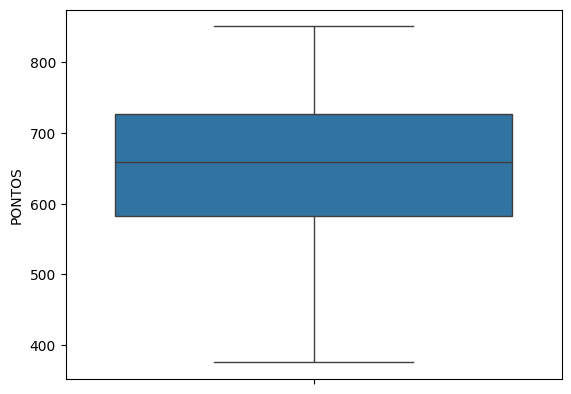

In [29]:
sns.boxplot(y=df['PONTOS'])
plt.show()
